# Explore here

In [1]:
# Importamos librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargamos la datasets
df = pd.read_csv('../data/raw/AB_NYC_2019.csv')

In [3]:
# Exploramos los datos
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# verificamos la información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Verificamos las estadisticas del dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [6]:
#Verificamos si existen datos duplicados
df.duplicated().sum()

np.int64(0)

In [7]:
# Verificamos la cantidad de datos faltantes
df.isnull().mean()*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [8]:
# Filtramos las filas con al menos un valor faltante
print(df[df[['name','host_name','last_review','reviews_per_month']].isnull().any(axis=1)])

             id                                               name   host_id  \
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
19         7750                  Huge 2 BR Upper East  Cental Park     17985   
26         8700  Magnifique Suite au N de Manhattan - vue Cloitres     26394   
36        11452                        Clean and Quiet in Brooklyn      7355   
38        11943                          Country space in the city     45445   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

             host_name neighbourhood_gr

Como se observa, en el dataframe filtrado los datos faltantes corresponden a:
name = descripción del lugar
host_name = nombre de la persona
last_review = fecha de ultima reseña
reviews_per_month = reseñas por mes

In [9]:
# Eliminamos estos datos
df.drop(['name', 'host_name', 'last_review', 'reviews_per_month'], axis = 1, inplace = True)
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [10]:
# verificamos los datos únicos del dataframe
n_unicos = df.nunique()
n_unicos

id                                48895
host_id                           37457
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
calculated_host_listings_count       47
availability_365                    366
dtype: int64

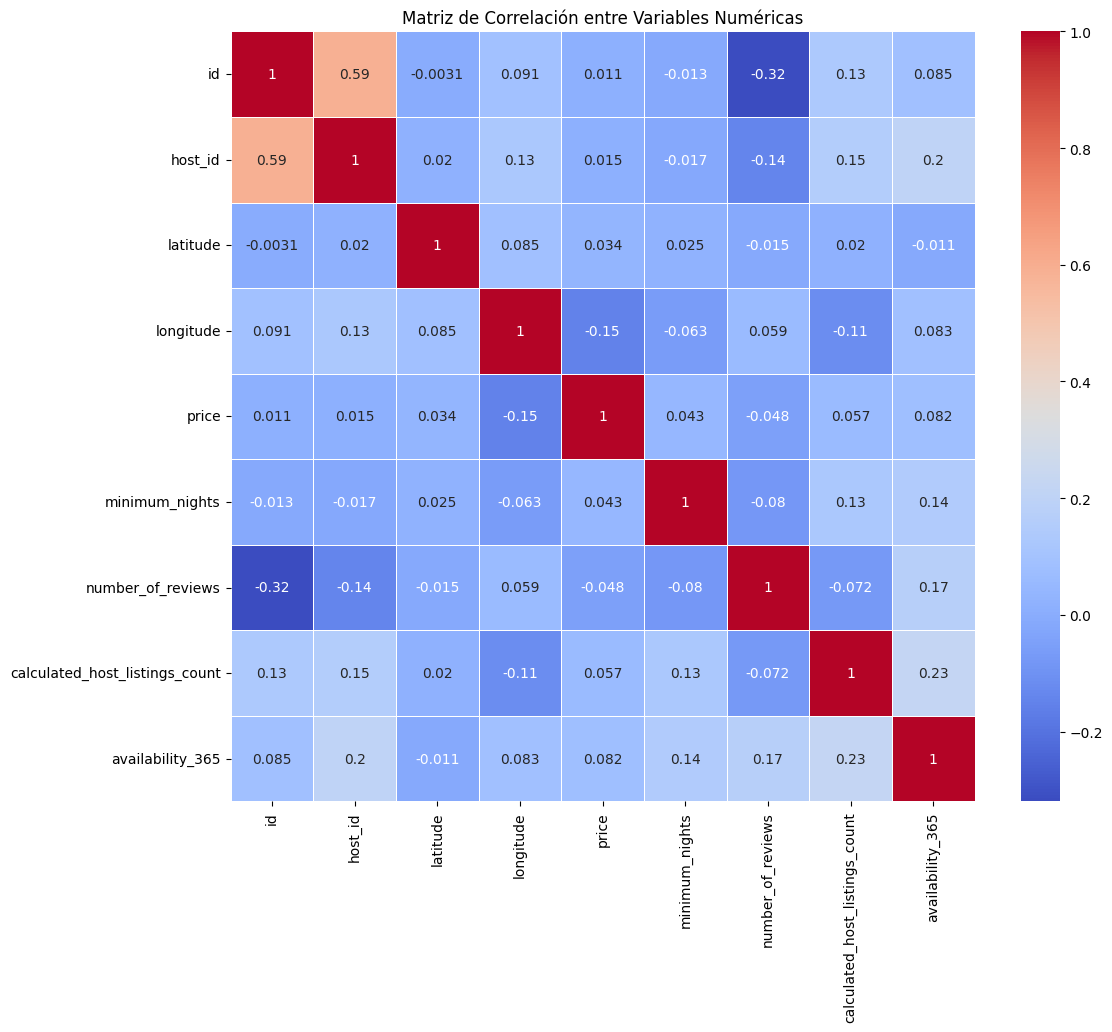

In [11]:
# Seleccionamos las columnas numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Creamos una matriz de correlación
correlation_matrix = df[columnas_numericas].corr()

# Generamos un heatmap de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

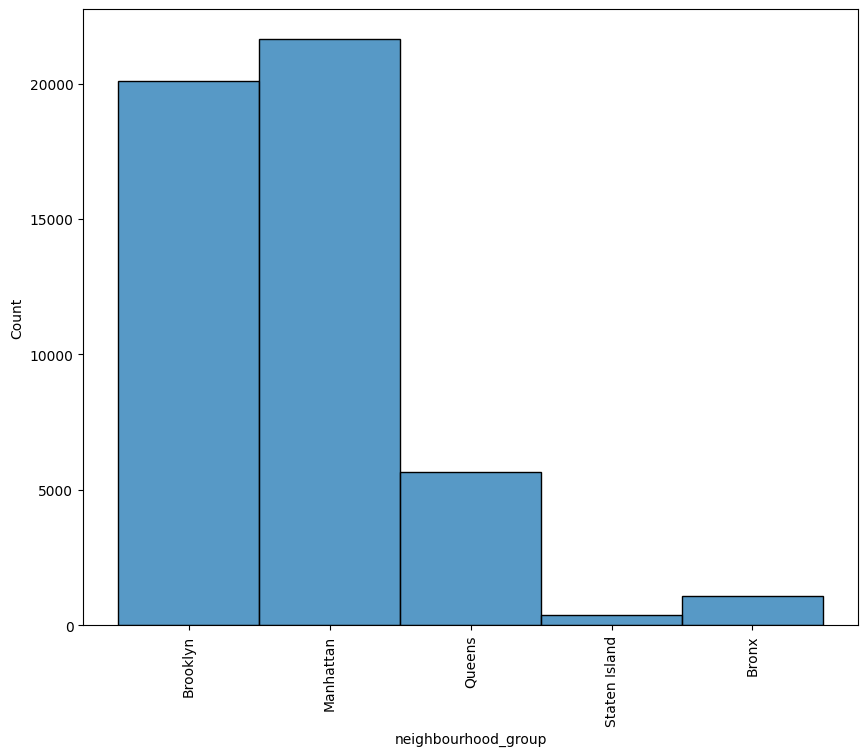

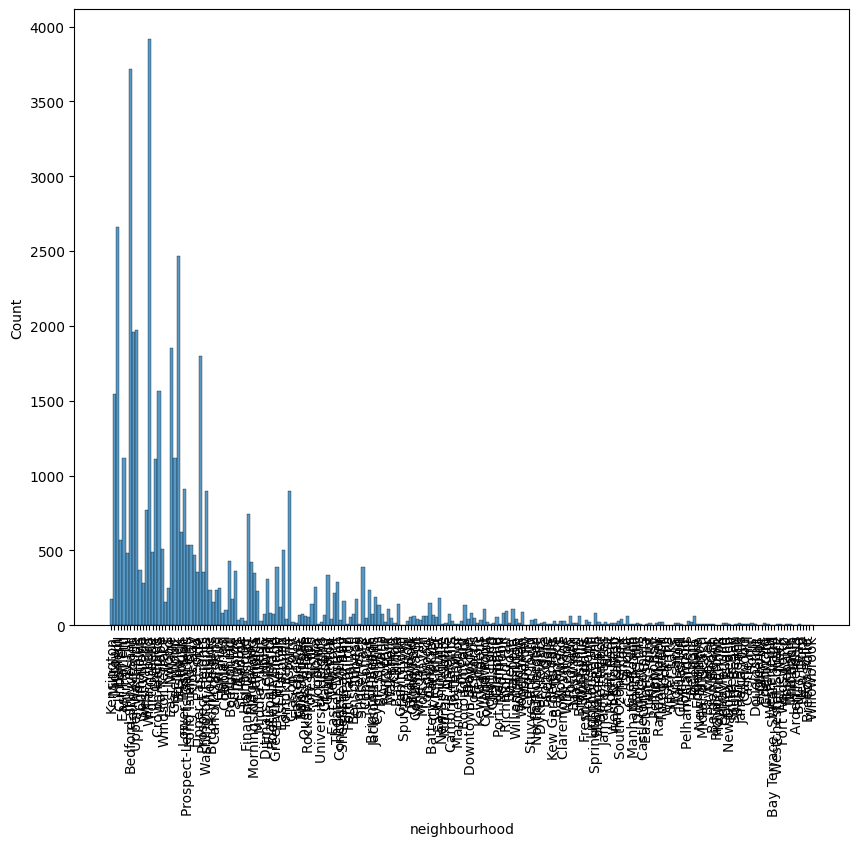

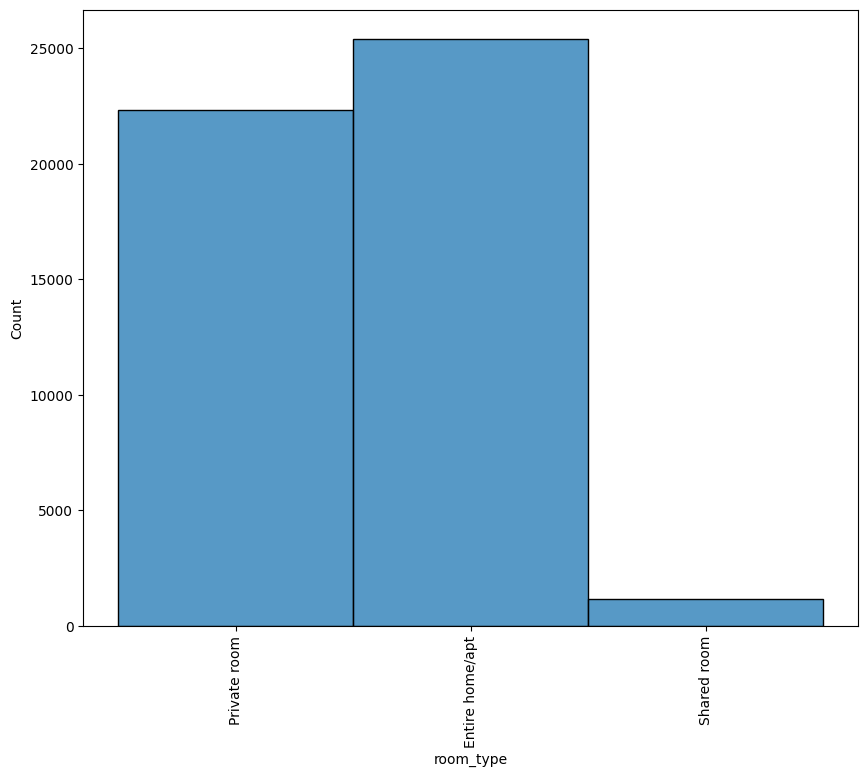

<Figure size 640x480 with 0 Axes>

In [12]:
#Seleccionamos las columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

# Creamos histogramas para columnas de interés
columnas_graficar = df[['neighbourhood_group', 'room_type']]
for cat_col in columnas_categoricas:
    plt.figure(figsize=(10, 8))
    sns.histplot(x=cat_col, data=df)
    plt.xticks(rotation=90)
    plt.show()

#Para mostrar la figura
plt.tight_layout()

En estos gráficos podemos concluir que los grupos de vecindarios de Manhanttan y Brooklyn son los que mas propiedades tienen dejando en 3º y 4º lugar a Queens y Bronx.
Ademas se nota que el cuarto compartido es el que menos anuncios posee, el primer lugar corresponde a las casas enteras y luego los cuartos privados

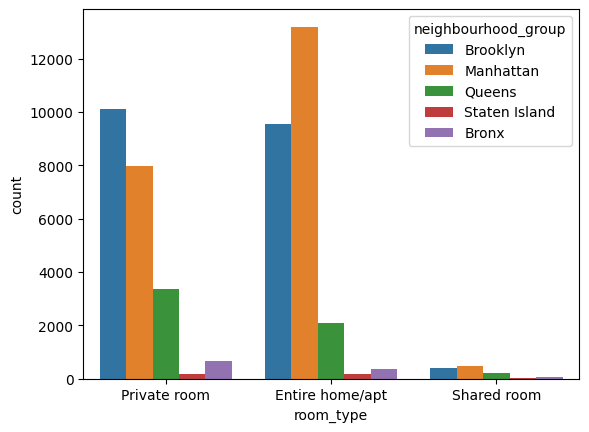

In [13]:
# Generamos un gráfico para detallar la relación entre los grupos de vecindarios con el tipo de vivienda
sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group")
plt.show()

Manhattan es el lugar con más lugares para alquilar, y el que tiene más Casas Enteras para alquilar.
Brooklyn es el segundo grupo más grande en alquiler, pero tiene más habitaciones privadas.
Queens y Bronx son el 3º y 4º y tienen la misma tendencia que Brooklyn.
Staten Island casi no tiene relevancia.
Pero aparte de esto, no se observa una gran relación entre el tipo de habitación y el grupo de vecindario.

Como se observa en los datos unicos y las gráficas realizadas las columnas:
id = todos son valores unicos
latitude y longitude = coordenadas que dirigen a New York y se pueden emplear para visualizar geograficamente las viviendas en alquiler pero que no apartan mas información relevante para este análisis.
Se eliminan estos datos innecesarios.

In [14]:
# Eliminamos los datos innecesarioa
df.drop(['id', 'latitude', 'longitude'], axis = 1, inplace = True)
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [15]:
#Factorizamos los datos categoricos que tenemos
df['room_type'] = pd.factorize(df['room_type'])[0]
df['neighbourhood_group'] = pd.factorize(df['neighbourhood_group'])[0]
df['neighbourhood'] = pd.factorize(df['neighbourhood'])[0]

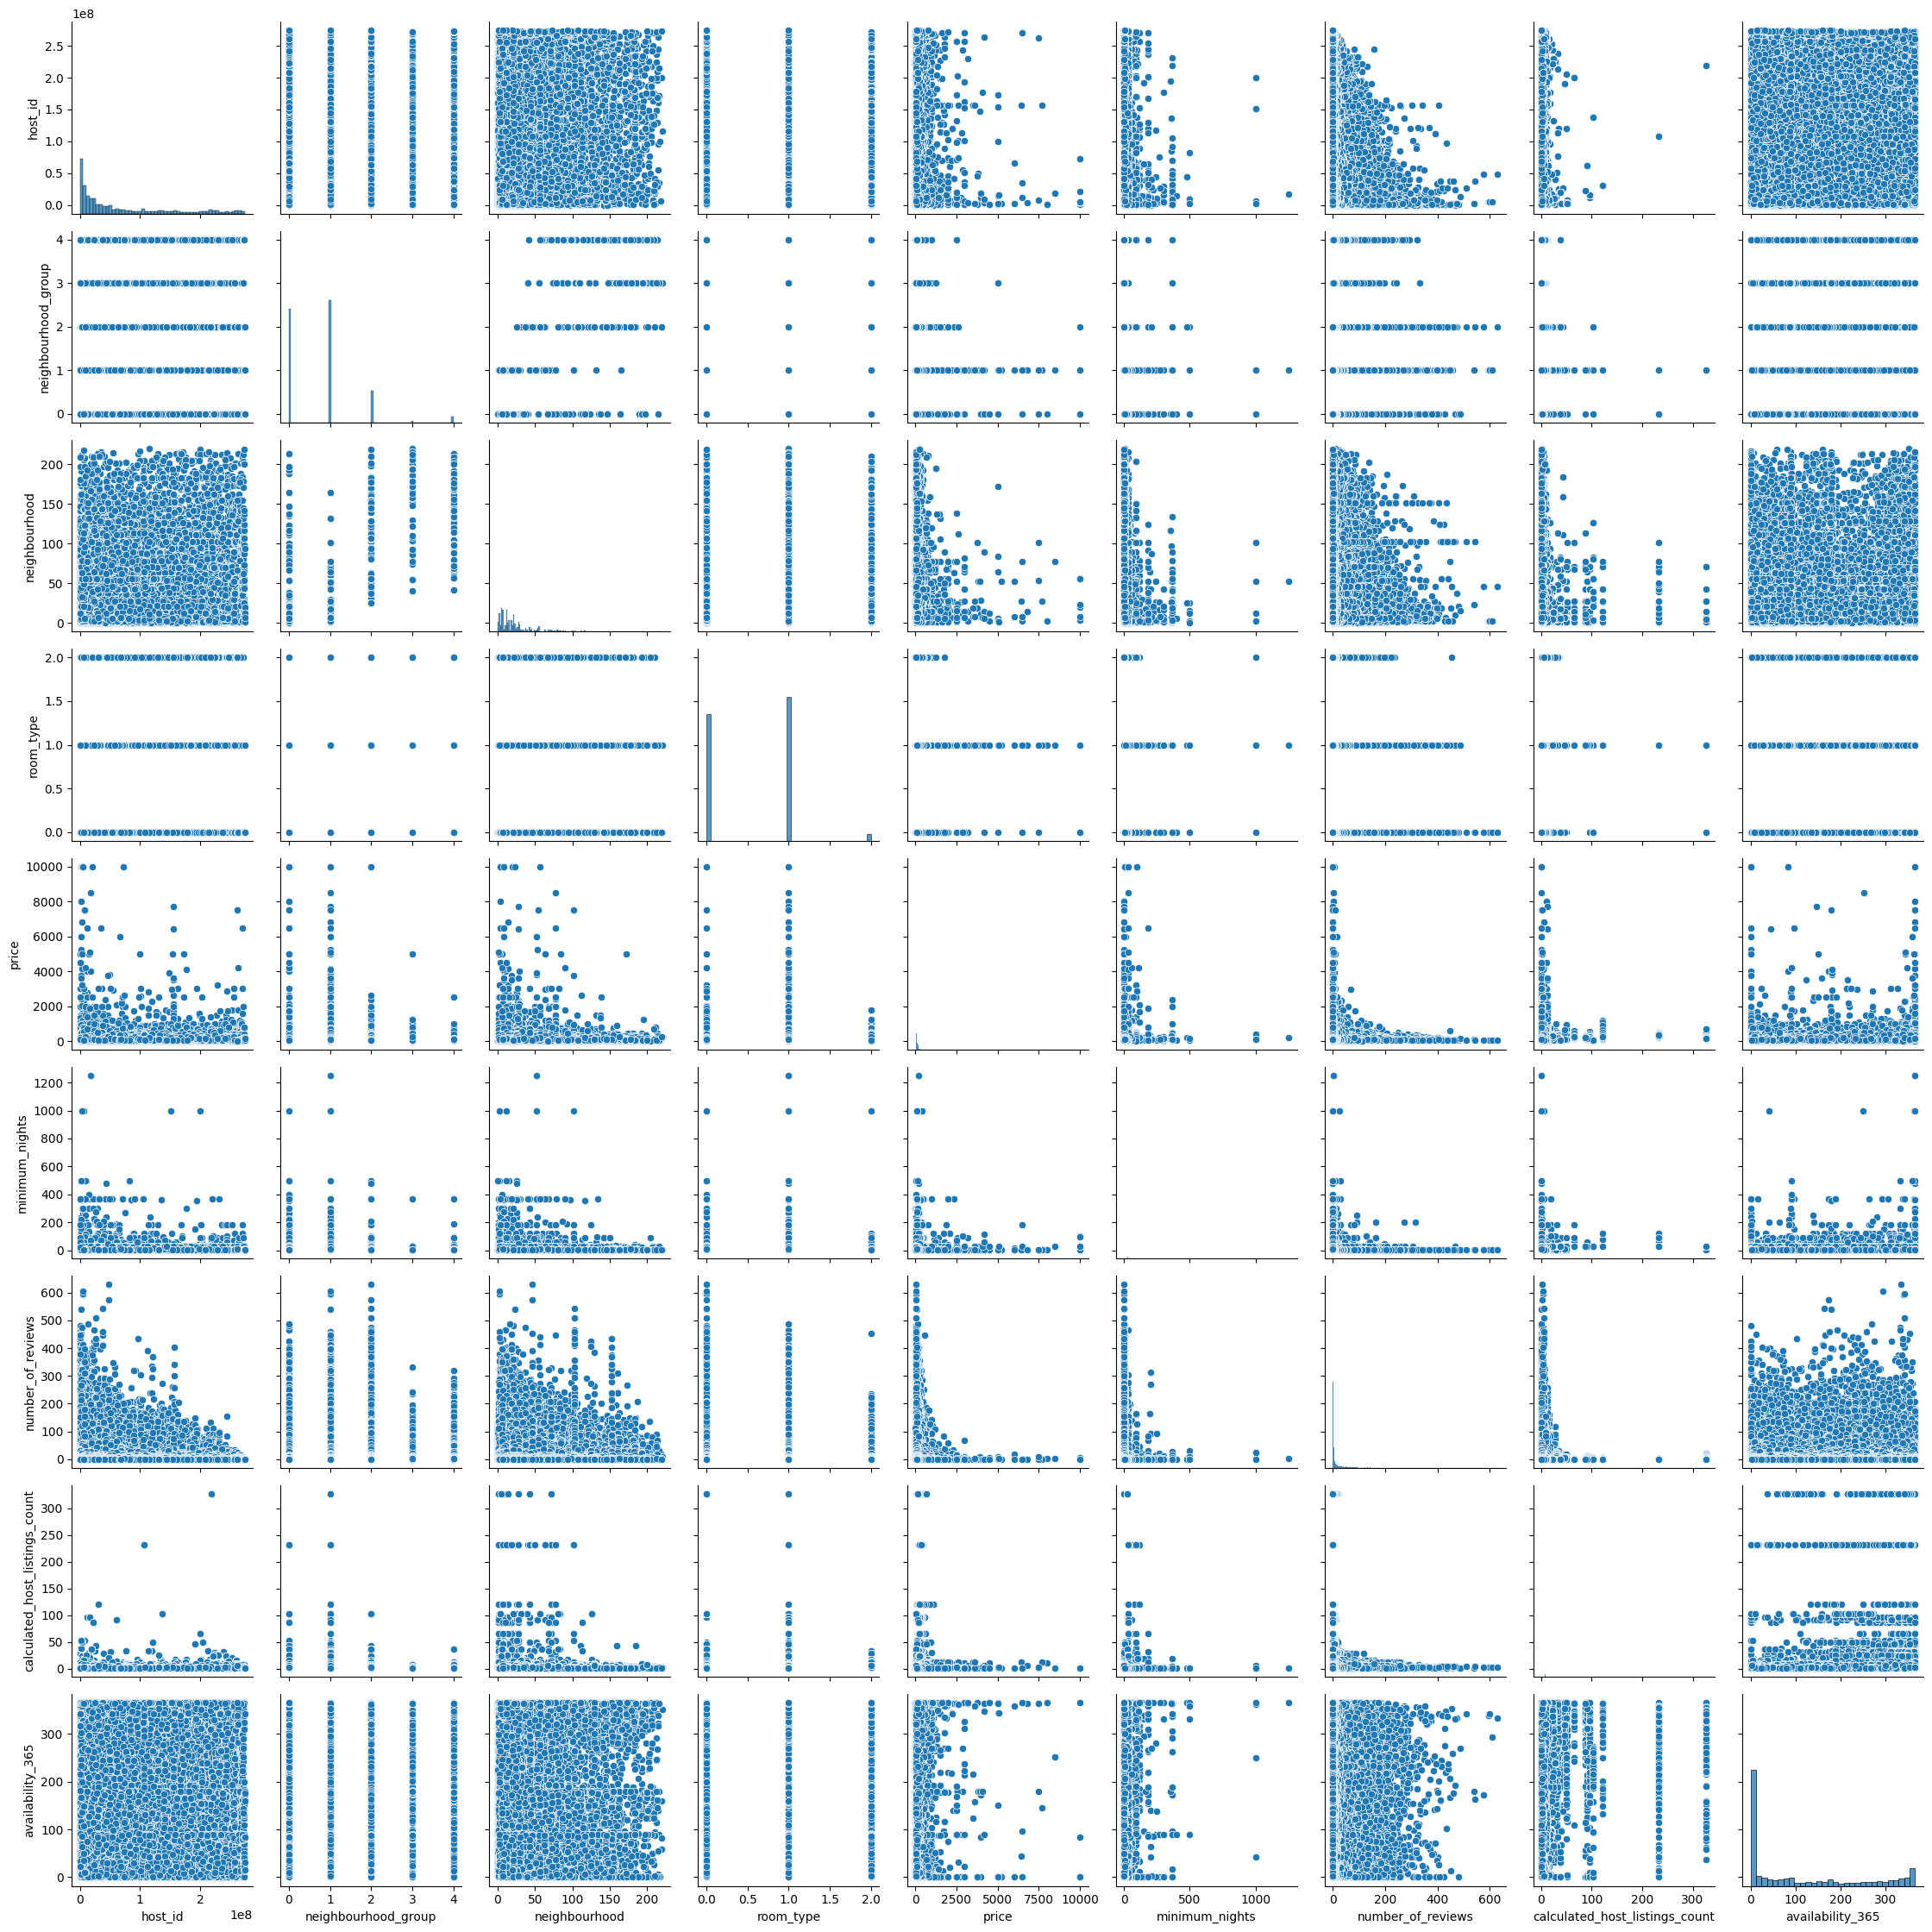

In [16]:
# Creamos un pairplot de todo el dataframe
sns.pairplot(df)
plt.tight_layout()
plt.show()

In [17]:
# verificamos nuevamente las estadisticas de nuestros datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
neighbourhood_group,48895.0,7.869107e-01,8.443860e-01,0.0,0.0,1.0,1.0,4.0
neighbourhood,48895.0,2.988878e+01,3.467663e+01,0.0,7.5,19.0,37.0,220.0
room_type,48895.0,5.671132e-01,5.412489e-01,0.0,0.0,1.0,1.0,2.0
price,48895.0,1.527207e+02,2.401542e+02,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.0,1.0,3.0,5.0,1250.0
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.0,1.0,5.0,24.0,629.0
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.0,1.0,1.0,2.0,327.0
availability_365,48895.0,1.127813e+02,1.316223e+02,0.0,0.0,45.0,227.0,365.0


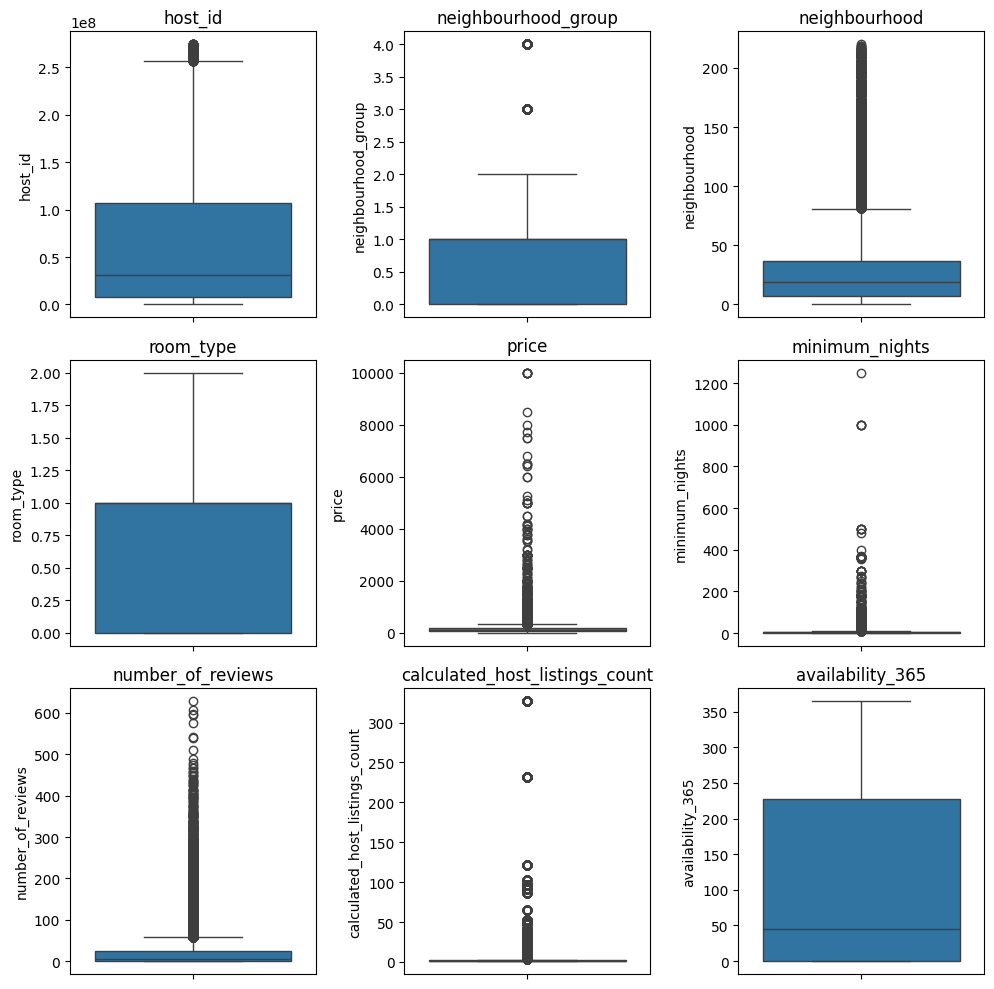

In [18]:
#Creamos boxplot para cada una
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()  # Convertimos los ejes en una lista plana para iterar

#Iteramos por cada columna del dataframe
for i, columna in enumerate(df.columns):
    sns.boxplot(ax=axes[i], y=columna, data=df)  
    axes[i].set_title(columna)

#Para mostrar el gráfico
plt.tight_layout()
plt.show()

Realizamos analisis de los valores atipicos de price, minimum_nights, number_of_reviews, calculated_host_listings_count.
Calculando los quartiles

In [19]:
#Asignamos a una variable las estadísticas de precio
price_1 = df.price.describe()
price_1

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [20]:
# Calculamos el rango y los limites superior e inferior
price_iqr = price_1["75%"] - price_1["25%"]
limite_superior = price_1["75%"] + 1.5 * price_iqr
limite_inferior = price_1["25%"] - 1.5 * price_iqr
print('los limites inferior y superior son', {limite_inferior},'y', {limite_superior}, 'con un rango de', {price_iqr})

los limites inferior y superior son {np.float64(-90.0)} y {np.float64(334.0)} con un rango de {np.float64(106.0)}


In [21]:
# Contamos la cantidad de valores con precio igual a cero
precio_0 = df[df.price == 0].shape[0]
print(precio_0)

# Contamos la cantidad de valores con precio superiores al limite superior mas rango
ls = limite_superior + price_iqr
precio_ls = df[df.price >= ls].shape[0]
print(precio_ls)

11
1623


In [22]:
# Eliminamos datos filtrando los datos de acuerdo al calculo realizado.
df = df[(df.price > 0) & (df.price <= 440)]

In [23]:
# Asignamos una variable a las estadísticas de noches mínimas
minimum_nights_1 = df.minimum_nights.describe()
minimum_nights_1

count    47265.000000
mean         6.976600
std         20.336138
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [24]:
# Calculamos el rango y los limites superior e inferior
minimum_nights_iqr = minimum_nights_1["75%"] - minimum_nights_1["25%"]
limite_superior_1 = minimum_nights_1["75%"] + 1.5 * minimum_nights_iqr
limite_inferior_1 = minimum_nights_1["25%"] - 1.5 * minimum_nights_iqr
print('los limites inferior y superior son', {limite_inferior_1},'y', {limite_superior_1}, 'con un rango de', {minimum_nights_iqr})

los limites inferior y superior son {np.float64(-5.0)} y {np.float64(11.0)} con un rango de {np.float64(4.0)}


In [25]:
# Contamos la cantidad de noches mínimas por encima de limite superior mas rango
ls1 = limite_superior_1 + minimum_nights_iqr
minimum_nights_ls = df[df["minimum_nights"] > ls1].shape[0]
minimum_nights_ls

5398

In [26]:
# Calculamos el porcentaje que representa estos datos en el dataframe
porciento_datos = minimum_nights_ls / df.shape[0] * 100
porciento_datos

11.420713001163652

Al ser una cantidad que en el dataframe representa mas del 10%, se sub-dividirá para verificar estos datos atipicos.

In [27]:
df1 = df[df["minimum_nights"] > ls1]
df1

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
6,7356,0,6,0,60,45,49,1,0
14,11975,1,11,1,120,90,27,1,0
36,7355,0,6,0,35,60,0,1,365
45,49670,0,24,1,150,29,11,1,95
55,56512,0,12,1,150,30,105,1,30
...,...,...,...,...,...,...,...,...,...
48810,274014453,1,8,0,75,30,0,1,90
48843,53966115,0,6,0,45,29,0,2,341
48871,144008701,1,2,0,35,29,0,2,31
48879,540335,0,12,1,120,20,0,1,22


In [28]:
# Verificamos las estadísticas de estos datos a evaluar
df1.minimum_nights.describe()

count    5398.000000
mean       38.084661
std        49.801229
min        16.000000
25%        30.000000
50%        30.000000
75%        30.000000
max      1250.000000
Name: minimum_nights, dtype: float64

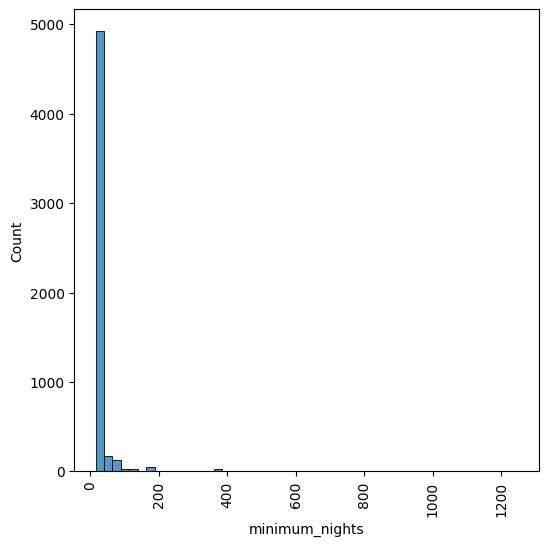

<Figure size 640x480 with 0 Axes>

In [29]:
# Graficamos los datos para visualizar la distribución de estos datos
plt.figure(figsize=(6, 6))
sns.histplot(x = 'minimum_nights', data=df1, bins = 50)
plt.xticks(rotation=90)
plt.show()

#Para mostrar la figura
plt.tight_layout()

In [30]:
# Asignamos a una variable las estadisticas de mínimo de noches
minimum_nights_2 = df1.minimum_nights.describe()

# Calculamos el rango y los limites superior e inferior
minimum_nights_iqr_2 = minimum_nights_2["75%"] - minimum_nights_2["25%"]
limite_superior_2 = minimum_nights_2["75%"] + 1.5 * minimum_nights_iqr_2
limite_inferior_2 = minimum_nights_2["25%"] - 1.5 * minimum_nights_iqr_2
print('los limites inferior y superior son', {limite_inferior_2},'y', {limite_superior_2}, 'con un rango de', {minimum_nights_iqr_2})

los limites inferior y superior son {np.float64(30.0)} y {np.float64(30.0)} con un rango de {np.float64(0.0)}


In [31]:
# Contabilizamos la cantidad de noches mínimas superiores a limite superior mas rango
ls2 = limite_superior_2 + minimum_nights_iqr_2
minimum_nights_ls2 = df[df["minimum_nights"] > ls2].shape[0]
minimum_nights_ls2

707

In [32]:
# Calculamos el porcentaje que representa estos datos en el dataframe
porciento_datos_1 = minimum_nights_ls2 / df.shape[0] * 100
porciento_datos_1

1.4958214323495187

In [33]:
# Eliminamos datos filtrando los datos de acuerdo al calculo realizado.
df = df[df["minimum_nights"] <= minimum_nights_ls2]

In [34]:
# Asignamos una variable a las estadísticas de número de reseñas
number_of_reviews_1 = df.number_of_reviews.describe()
number_of_reviews_1

count    47260.000000
mean        23.662188
std         44.975120
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [35]:
# Calculamos el rango y los limites superior e inferior
number_of_reviews_iqr = number_of_reviews_1["75%"] - number_of_reviews_1["25%"]
limite_superior_3 = number_of_reviews_1["75%"] + 1.5 * number_of_reviews_iqr
limite_inferior_3 = number_of_reviews_1["25%"] - 1.5 * number_of_reviews_iqr
print('los limites inferior y superior son', {limite_inferior_3},'y', {limite_superior_3}, 'con un rango de', {number_of_reviews_iqr})

los limites inferior y superior son {np.float64(-33.5)} y {np.float64(58.5)} con un rango de {np.float64(23.0)}


In [36]:
# Calculamos la cantidad de datos entre la suma del limite superior mas el rango
ls3 = limite_superior_3 + number_of_reviews_iqr
number_of_reviews_ls = df[df.number_of_reviews > ls3].shape[0]
print(number_of_reviews_ls)

3991


In [37]:
# Calculo de porcentaje que representa estos datos
porciento_datos_2 = number_of_reviews_ls / df.shape[0] * 100
print(porciento_datos_2)

8.444773592890394


Como se observa hay un poco mas de 8% de datos entre el valor maximo y el limite superior mas el rango. Se procede a evaluar este nuevo sub-datos como se realizo con las cantidad de noches mínimas

In [38]:
df2 = df[df.number_of_reviews > ls3]
df2

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
3,4869,0,3,1,89,1,270,1,194
7,8967,1,7,0,79,2,430,1,220
8,7490,1,8,0,79,2,118,1,0
9,7549,1,9,1,150,1,160,4,188
11,7989,1,7,0,85,2,188,1,39
...,...,...,...,...,...,...,...,...,...
40025,232251881,2,152,0,100,1,86,8,335
40036,232251881,2,46,0,30,1,98,8,189
40297,232251881,2,46,0,67,1,95,8,145
42075,244361589,1,71,0,100,1,156,9,299


In [39]:
# verificamos las estadísticas de estos datos a evaluar
df2.number_of_reviews.describe()

count    3991.000000
mean      145.431471
std        65.073652
min        82.000000
25%       100.000000
50%       126.000000
75%       170.000000
max       629.000000
Name: number_of_reviews, dtype: float64

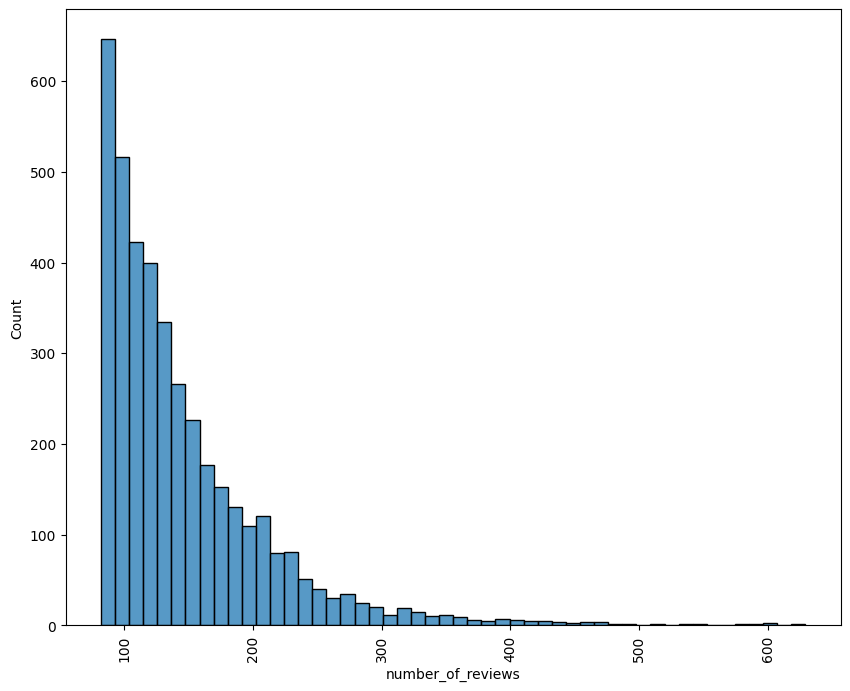

<Figure size 640x480 with 0 Axes>

In [40]:
# Graficamos para visualizar la distribución de estos datos
plt.figure(figsize=(10, 8))
sns.histplot(x = 'number_of_reviews', data=df2, bins = 50)
plt.xticks(rotation=90)
plt.show()

#Para mostrar la figura
plt.tight_layout()

In [41]:
# Asignamos a una variable las estadisticas de numero de reseñas
number_of_reviews_2 = df2.number_of_reviews.describe()

# Calculamos el rango y los limites superior e inferior
number_of_reviews_iqr_2 = number_of_reviews_2["75%"] - number_of_reviews_2["25%"]
limite_superior_4 = number_of_reviews_2["75%"] + 1.5 * number_of_reviews_iqr_2
limite_inferior_4 = number_of_reviews_2["25%"] - 1.5 * number_of_reviews_iqr_2
print('los limites inferior y superior son', {limite_inferior_4},'y', {limite_superior_4}, 'con un rango de', {number_of_reviews_iqr_2})

los limites inferior y superior son {np.float64(-5.0)} y {np.float64(275.0)} con un rango de {np.float64(70.0)}


In [43]:
# Calculo de cantidad de datos superiores al limite superior mas el rango
ls4 = limite_superior_4 + number_of_reviews_iqr_2
number_of_reviews_ls4 = df[df.number_of_reviews > ls4].shape[0]
number_of_reviews_ls4

76

In [44]:
# Calculo de porcentaje que representa estos ultimos datos
porciento_datos_3 = number_of_reviews_ls4 / df.shape[0] * 100
print(porciento_datos_3)

0.1608125264494287


In [45]:
#Eliminamos los datos de acuerdo a los calculos hechos
df = df[df.number_of_reviews <= number_of_reviews_ls4]

In [46]:
# Asignamos una variable a las estadísticas de número de anuncios por anfitrion
anuncios = df.calculated_host_listings_count.describe()
anuncios

count    42920.000000
mean         7.480056
std         33.855001
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [47]:
# Calculamos el rango y los limites superior e inferior
anuncios_iqr = anuncios["75%"] - anuncios["25%"]
limite_superior_5 = anuncios["75%"] + 1.5 * anuncios_iqr
limite_inferior_5 = anuncios["25%"] - 1.5 * anuncios_iqr
print('los limites inferior y superior son', {limite_inferior_5},'y', {limite_superior_5}, 'con un rango de', {anuncios_iqr})

los limites inferior y superior son {np.float64(-0.5)} y {np.float64(3.5)} con un rango de {np.float64(1.0)}


In [48]:
# Calculo de cantidad de datos superiores al limite superior mas el rango
ls5 = limite_superior_5 + anuncios_iqr
anuncios_ls5 = df[df.calculated_host_listings_count > ls5].shape[0]
anuncios_ls5

5042

In [49]:
# Calculo de porcentaje que representa estos ultimos datos
porciento_datos_4 = anuncios_ls5 / df.shape[0] * 100
print(porciento_datos_4)

11.74743709226468


Los datos filtrados son mas del 11% del datasets por lo que procede a evaluar estos datos

In [50]:
df3 = df[df.calculated_host_listings_count > ls5]
df3

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,0,0,0,149,1,9,6,365
22,22486,0,16,0,80,1,39,6,364
23,22486,0,16,0,110,2,71,6,304
92,51038,0,3,0,98,7,16,6,185
111,51038,0,3,0,125,2,19,6,250
...,...,...,...,...,...,...,...,...,...
48857,63272360,2,129,1,85,3,0,6,300
48867,261338177,0,67,2,25,1,0,6,338
48868,261338177,0,67,2,25,7,0,6,365
48878,41326856,2,81,0,45,1,0,5,172


In [53]:
# Verificamos las estadisticas de estos datos a evaluar
df3.calculated_host_listings_count.describe()

count    5042.000000
mean       53.420666
std        85.804240
min         5.000000
25%         7.000000
50%        12.000000
75%        52.000000
max       327.000000
Name: calculated_host_listings_count, dtype: float64

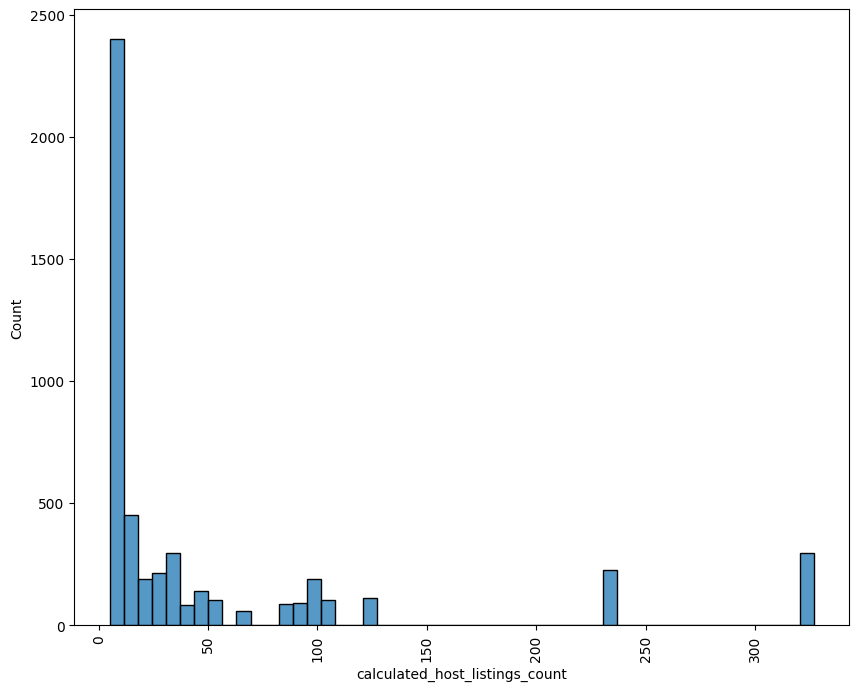

<Figure size 640x480 with 0 Axes>

In [51]:
# Graficamos para visualizar la distribución de estos datos
plt.figure(figsize=(10, 8))
sns.histplot(x = 'calculated_host_listings_count', data=df3, bins = 50)
plt.xticks(rotation=90)
plt.show()

#Para mostrar la figura
plt.tight_layout()

In [52]:
# Asignamos a una variable las estadisticas de anuncios por anfitrion
anuncios_1 = df3.calculated_host_listings_count.describe()

# Calculamos el rango y los limites superior e inferior
anuncios_iqr_1 = anuncios_1["75%"] - anuncios_1["25%"]
limite_superior_6 = anuncios_1["75%"] + 1.5 * anuncios_iqr_1
limite_inferior_6 = anuncios_1["25%"] - 1.5 * anuncios_iqr_1
print('los limites inferior y superior son', {limite_inferior_6},'y', {limite_superior_6}, 'con un rango de', {anuncios_iqr_1})

los limites inferior y superior son {np.float64(-60.5)} y {np.float64(119.5)} con un rango de {np.float64(45.0)}


In [54]:
# Calculo de cantidad de datos superiores al limite superior mas el rango
ls6 = limite_superior_6 + anuncios_iqr_1
anuncios_ls6 = df[df.calculated_host_listings_count > ls6].shape[0]
anuncios_ls6

522

In [55]:
# Calculo de porcentaje que representa estos ultimos datos
porciento_datos_5 = anuncios_ls6 / df.shape[0] * 100
print(porciento_datos_5)

1.2162162162162162


In [56]:
# Eliminando datos de acuerdo al calculo realizado
df = df[df.calculated_host_listings_count <= ls6]

Finalizado la eliminación de datos que pueden afectar a la estadistica del dataframe se evalua los nuevos datos

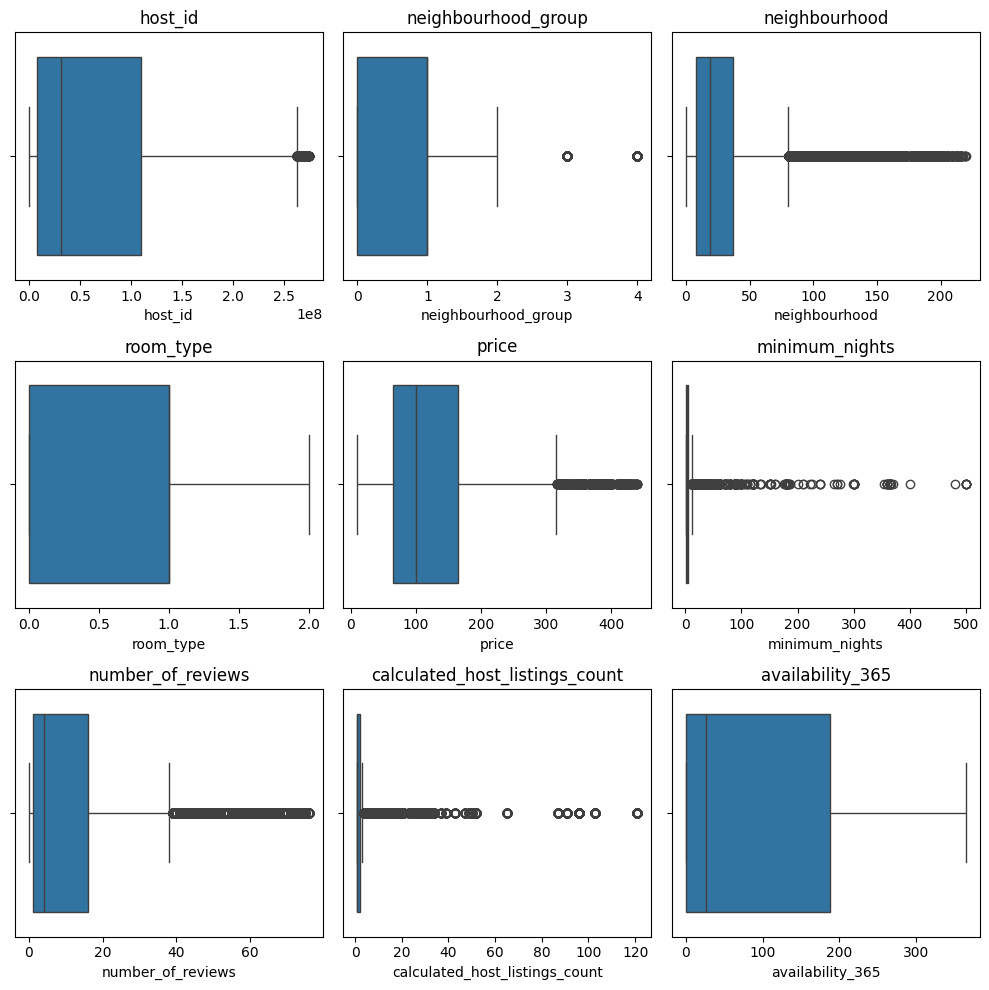

In [57]:
#Creamos boxplot para cada una
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()  # Convertimos los ejes en una lista plana para iterar

#Iteramos por cada columna del dataframe
for i, columna in enumerate(df.columns):
    sns.boxplot(ax=axes[i], x=columna, data=df)  
    axes[i].set_title(columna)

#Para mostrar el gráfico
plt.tight_layout()
plt.show()

In [58]:
# Verificamos la estadisticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,42398.0,6.871745e+07,7.940806e+07,2438.0,8288437.0,31675601.0,109858173.0,274321313.0
neighbourhood_group,42398.0,7.826313e-01,8.531146e-01,0.0,0.0,1.0,1.0,4.0
neighbourhood,42398.0,3.013949e+01,3.500745e+01,0.0,8.0,19.0,37.0,220.0
room_type,42398.0,5.519128e-01,5.463026e-01,0.0,0.0,1.0,1.0,2.0
price,42398.0,1.264103e+02,7.958373e+01,10.0,65.0,100.0,165.0,440.0
minimum_nights,42398.0,7.052668e+00,1.776619e+01,1.0,1.0,3.0,5.0,500.0
number_of_reviews,42398.0,1.200960e+01,1.713792e+01,0.0,1.0,4.0,16.0,76.0
calculated_host_listings_count,42398.0,4.052550e+00,1.292440e+01,1.0,1.0,1.0,2.0,121.0
availability_365,42398.0,1.021933e+02,1.294496e+02,0.0,0.0,26.0,188.0,365.0


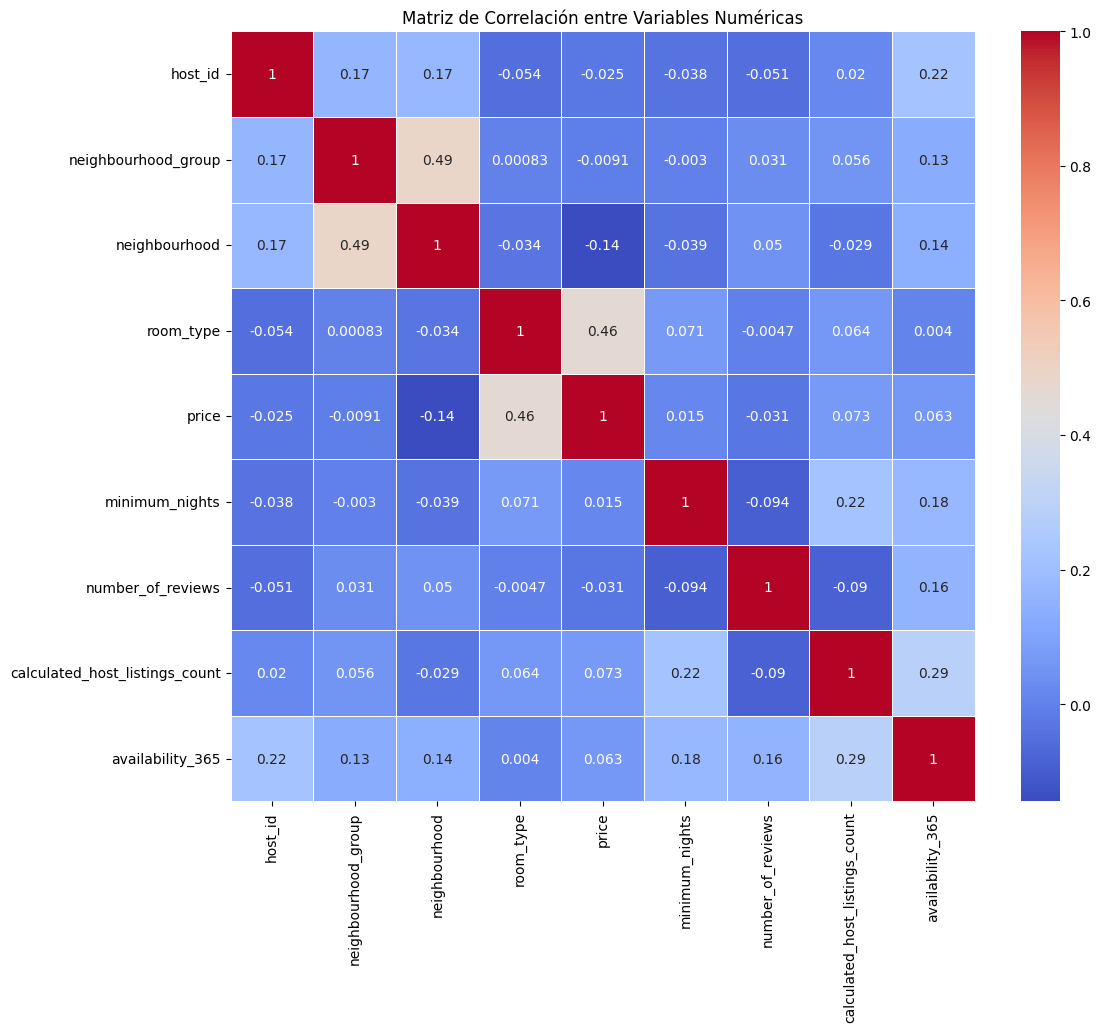

In [59]:
# Creamos una matriz de correlación
correlation_matrix = df.corr()

# Generamos un heatmap de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

In [60]:
# Escalamos las variables para estandarizar los datos
df4 = df.drop(['price'], axis = 1)
scaler = MinMaxScaler()
scal_variable = scaler.fit_transform(df4)
df5 = pd.DataFrame(scal_variable, index = df4.index, columns = df4.columns)
df5["price"] = df["price"]
df5.head()

,host_id,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
0,0.000001,0.00,0.000000,0.0,0.000000,0.118421,0.041667,1.000000,149
1,0.000001,0.25,0.004545,0.5,0.000000,0.592105,0.008333,0.972603,225
2,0.000008,0.25,0.009091,0.0,0.004008,0.000000,0.000000,1.000000,150
4,0.000017,0.25,0.018182,0.5,0.018036,0.118421,0.000000,0.000000,80
5,0.000018,0.25,0.022727,0.5,0.004008,0.973684,0.000000,0.353425,200


In [61]:
# Separamos las variables independientes de la dependiente
X = df5.drop(['price'], axis=1)
y = df5['price']

# Ajusta un modelo de regresión lineal
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

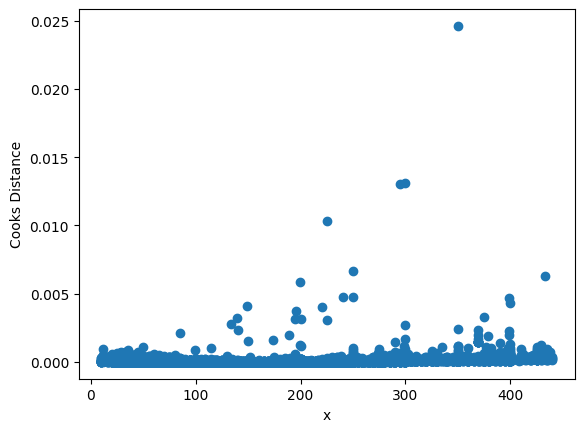

In [62]:
# Graficamos los datos 
plt.scatter(df5.price, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [63]:
# Punto de corte para la distancia de cook
pto_corte = 4/len(df)

# Viviendas por encima del pto de corte
len(np.where(cooks_distance[0]>pto_corte)[0])

2824

In [64]:
# Eliminar observaciones que se consideran influentes
indices_a_eliminar = np.where(cooks_distance[0] > pto_corte)[0]
indices_a_eliminar = df5.index[indices_a_eliminar]

In [65]:
# Eliminar observaciones que se consideran influentes
df6 = df5.drop(indices_a_eliminar, axis = 0)

In [66]:
# Separamos las variables independientes de la dependiente
X = df6.drop("price", axis = 1)
y = df6["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [67]:
# Guardamos los datos
X_train["price"] = list(y_train)
X_test["price"] = list(y_test)
X_train.to_csv("../data/processed/clean_train.csv", index = False)
X_test.to_csv("../data/processed/clean_test.csv", index = False)